In [1]:
include("src/Sim.jl")

Main.Sim

In [2]:
using DifferentialEquations
using Plots
using .Sim

In [29]:
@model RLC begin
    @parameter R L C
    @blk int1 = IntegratorBlock()
    @blk int2 = IntegratorBlock()
    @blk in1 = InBlock()
    @blk in2 = InBlock()
    @blk out1 = OutBlock()
    @blk gain1 = GainBlock(R)
    @blk gain2 = GainBlock(1/C)
    @blk gain3 = GainBlock(1/L)
    @connect gain3 <= in1 - gain1 - int1 + in2
    @connect int2 <= gain3
    @connect out1 <= int2
    @connect gain1 <= int2
    @connect gain2 <= int2
    @connect int1 <= gain2
end

RLC (generic function with 1 method)

In [30]:
systemequation(RLC())

quote
    #= /Users/nagatayuto/Desktop/JSSimJulia(Github)/src/SystemBlock.jl:116 =#
    modelinit = [0.0, 0.0]
    #= /Users/nagatayuto/Desktop/JSSimJulia(Github)/src/SystemBlock.jl:117 =#
    function model!(var"d##428", var"##428", p, t)
        #= /Users/nagatayuto/Desktop/JSSimJulia(Github)/src/SystemBlock.jl:118 =#
        begin
            var"d##428"[1] = (1.0 / C) * var"##428"[2]
            var"d##428"[2] = (1.0 / L) * (((terminator - R * var"##428"[2]) - var"##428"[1]) + terminator)
        end
    end
end

In [49]:
@model Test begin
    @parameter R L C
    @blk system = RLC(R=R, L=L, C=C) inport[1]:f inport[2]:g outport:i
    @blk source = StepBlock(time=0.1, value=5.0) outport:v
    @blk source2 = StepBlock(time=0.1, value=3.0) outport:vv
    @connect source => f
    @connect source2 => g
end

Test (generic function with 1 method)

In [50]:
systemequation(Test())

quote
    #= /Users/nagatayuto/Desktop/JSSimJulia(Github)/src/SystemBlock.jl:116 =#
    modelinit = [0.0, 0.0]
    #= /Users/nagatayuto/Desktop/JSSimJulia(Github)/src/SystemBlock.jl:117 =#
    function model!(var"d##451", var"##451", p, t)
        #= /Users/nagatayuto/Desktop/JSSimJulia(Github)/src/SystemBlock.jl:118 =#
        begin
            var"d##451"[1] = (1.0 / C) * var"##451"[2]
            var"d##451"[2] = (1.0 / L) * (((if t < 0.1
                                    0
                                else
                                    5.0
                                end - R * var"##451"[2]) - var"##451"[1]) + if t < 0.1
                            0
                        else
                            3.0
                        end)
        end
    end
end

In [51]:
m = Test(R=100.0, L=100e-3, C=100e-6)
prob = odeproblem(m, tspan = (0.0, 1.0))

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 1.0)
u0: [0.0, 0.0]

In [55]:
@time solution = solve(prob);
output = scope(m, :i, solution);
input1 = scope(m, :v, solution);
input2 = scope(m, :vv, solution);

  0.000681 seconds (993 allocations: 75.266 KiB)


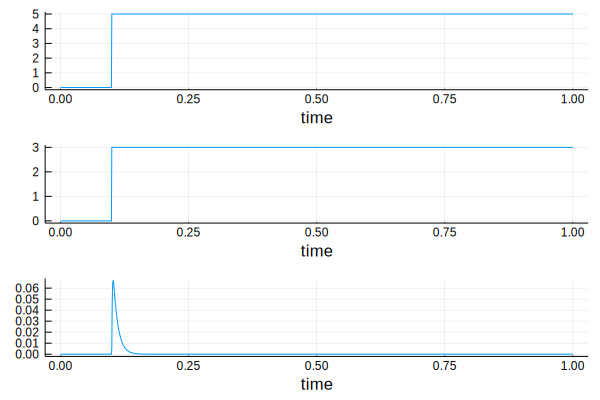

In [57]:
plot([input1,input2,output], 0.0, 1.0, layout=(3,1), xlabel="time", leg=false)